МОДЕЛИ

In [14]:
%pip install numpy
%pip install pandas
%pip install matplotlib.pyplot
%pip install statsmodels
%pip install sklearn
%pip install xgboost
%pip install mlxtend
%pip install textstat
%pip install torch

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for matplotlib.pyplot


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable




[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/939.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/939.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/939.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/939.4 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/939.4 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/939.4 kB ? eta -:--:--
   --------------------- ---------------- 524.3/939.4 kB 466.4 kB/s eta 0:00:01
   --------------------- ---------------- 524.3/939.4 kB 466.4 kB/s eta 0:00:01
   --------------------- ---------------- 524.3/939.4 kB 466.4 kB/s eta 0:00:01
   --------------------- ---------------- 524.3/939.4 kB 466.4 kB/s eta 0:00:01
   --------------------- ---------------- 524.3/939.4 kB 466.4 kB/s eta 0:00:01
   ------------------------------- ------ 786.4/939.4 kB 313.6 kB/s eta 0:00:01
   ---------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


XGBOOST


Анализ комментария: 'Мастер быстро пришел и качественно выполнил работу'


C:\Users\user\AppData\Local\Temp\ipykernel_11836\2961345706.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Вероятность', y='Категория', data=prob_df, palette='viridis')


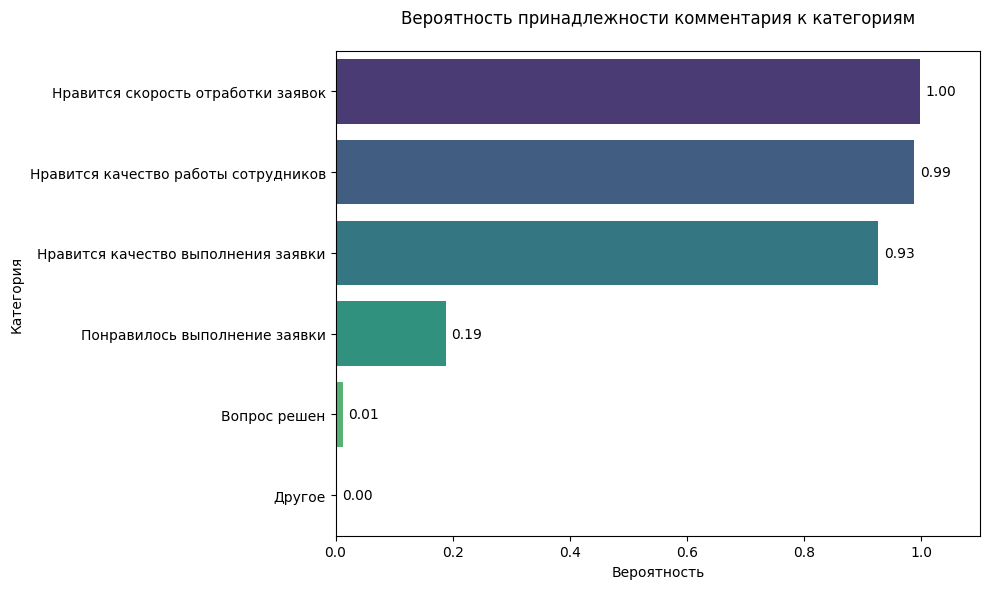

,Категория,Вероятность
0,Нравится скорость отработки заявок,0.997168
2,Нравится качество работы сотрудников,0.988120
1,Нравится качество выполнения заявки,0.926059
3,Понравилось выполнение заявки,0.187908
4,Вопрос решен,0.012077
5,Другое,0.001466



Анализ комментария: 'Спасибо за оперативность, вопрос решен'


C:\Users\user\AppData\Local\Temp\ipykernel_11836\2961345706.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Вероятность', y='Категория', data=prob_df, palette='viridis')


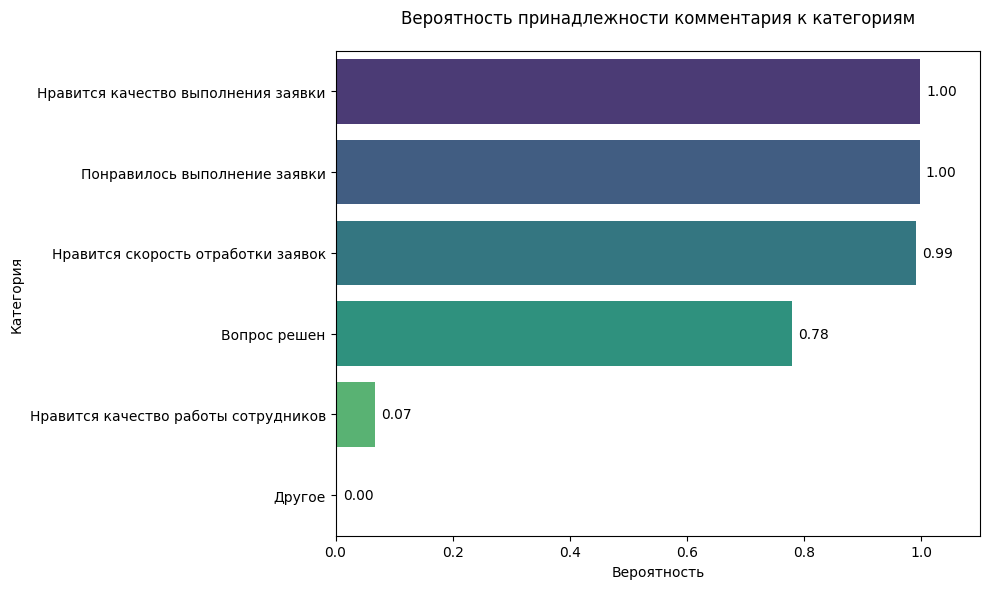

,Категория,Вероятность
1,Нравится качество выполнения заявки,0.997888
3,Понравилось выполнение заявки,0.997071
0,Нравится скорость отработки заявок,0.990929
4,Вопрос решен,0.779464
2,Нравится качество работы сотрудников,0.067674
5,Другое,0.002813



Анализ комментария: 'Непонятно что происходит, никто не отвечает'


C:\Users\user\AppData\Local\Temp\ipykernel_11836\2961345706.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Вероятность', y='Категория', data=prob_df, palette='viridis')


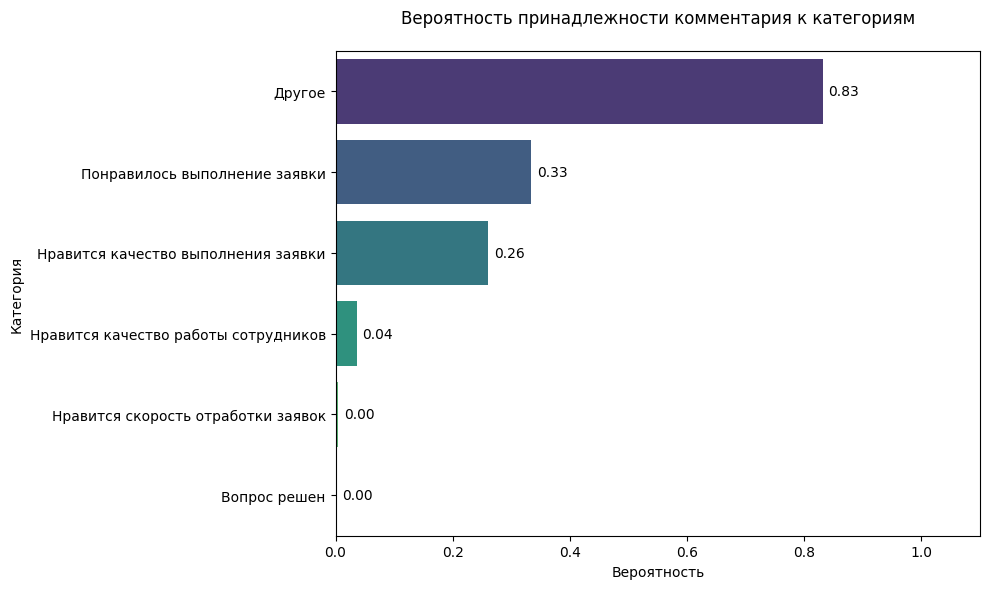

,Категория,Вероятность
5,Другое,0.831414
3,Понравилось выполнение заявки,0.334449
1,Нравится качество выполнения заявки,0.260480
2,Нравится качество работы сотрудников,0.036223
0,Нравится скорость отработки заявок,0.004602
4,Вопрос решен,0.001186


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
import seaborn as sns

# Загрузка данных
df = pd.read_csv('Main_комментарии.csv')

# Переименовываем колонку "Без категории" в "Другое"
df = df.rename(columns={'Без категории': 'Другое'})

# Определение целевых переменных
categories = [
    'Нравится скорость отработки заявок',
    'Нравится качество выполнения заявки',
    'Нравится качество работы сотрудников',
    'Понравилось выполнение заявки',
    'Вопрос решен',
    'Другое'
]

# Подготовка данных
X = df['comment'].values
y = df[categories].values

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Векторизация текста
vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words=['спасибо', 'благодарю', 'огромное', 'большое', 'очень'],
    ngram_range=(1, 2)
)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Создание и обучение модели
model = MultiOutputClassifier(
    XGBClassifier(
        n_estimators=150,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
)
model.fit(X_train_vec, y_train)

# Функция для визуализации предсказаний
def plot_prediction(text):
    """
    Визуализирует предсказания модели в виде столбчатой диаграммы
    
    Параметры:
    text (str): Текст комментария для анализа
    """
    # Преобразование текста
    text_vec = vectorizer.transform([text])
    
    # Предсказание вероятностей
    try:
        # Для версий sklearn, где predict_proba доступен
        probabilities = np.array([estimator.predict_proba(text_vec)[:, 1] for estimator in model.estimators_])
    except AttributeError:
        # Если predict_proba недоступен, используем predict
        predictions = model.predict(text_vec)[0]
        probabilities = predictions.astype(float)
    
    # Создаем DataFrame для визуализации
    prob_df = pd.DataFrame({
        'Категория': categories,
        'Вероятность': probabilities.flatten()
    })
    
    # Сортируем по вероятности
    prob_df = prob_df.sort_values('Вероятность', ascending=False)
    
    # Создаем график
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Вероятность', y='Категория', data=prob_df, palette='viridis')
    
    # Добавляем значения на график
    for p in ax.patches:
        width = p.get_width()
        plt.text(width + 0.01, p.get_y() + p.get_height()/2., '{:.2f}'.format(width), ha='left', va='center')
    
    # Настройки графика
    plt.title('Вероятность принадлежности комментария к категориям', pad=20)
    plt.xlabel('Вероятность')
    plt.ylabel('Категория')
    plt.xlim(0, 1.1)
    plt.tight_layout()
    plt.show()

    # Возвращаем DataFrame с результатами
    return prob_df

# Примеры использования с визуализацией
sample_comments = [
    "Мастер быстро пришел и качественно выполнил работу",
    "Спасибо за оперативность, вопрос решен",
    "Непонятно что происходит, никто не отвечает",
]

for comment in sample_comments:
    print(f"\nАнализ комментария: '{comment}'")
    result_df = plot_prediction(comment)
    display(result_df)

NETWORKX

C:\Users\user\AppData\Local\Temp\ipykernel_11836\2094102635.py:58: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for connectionstyle.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(


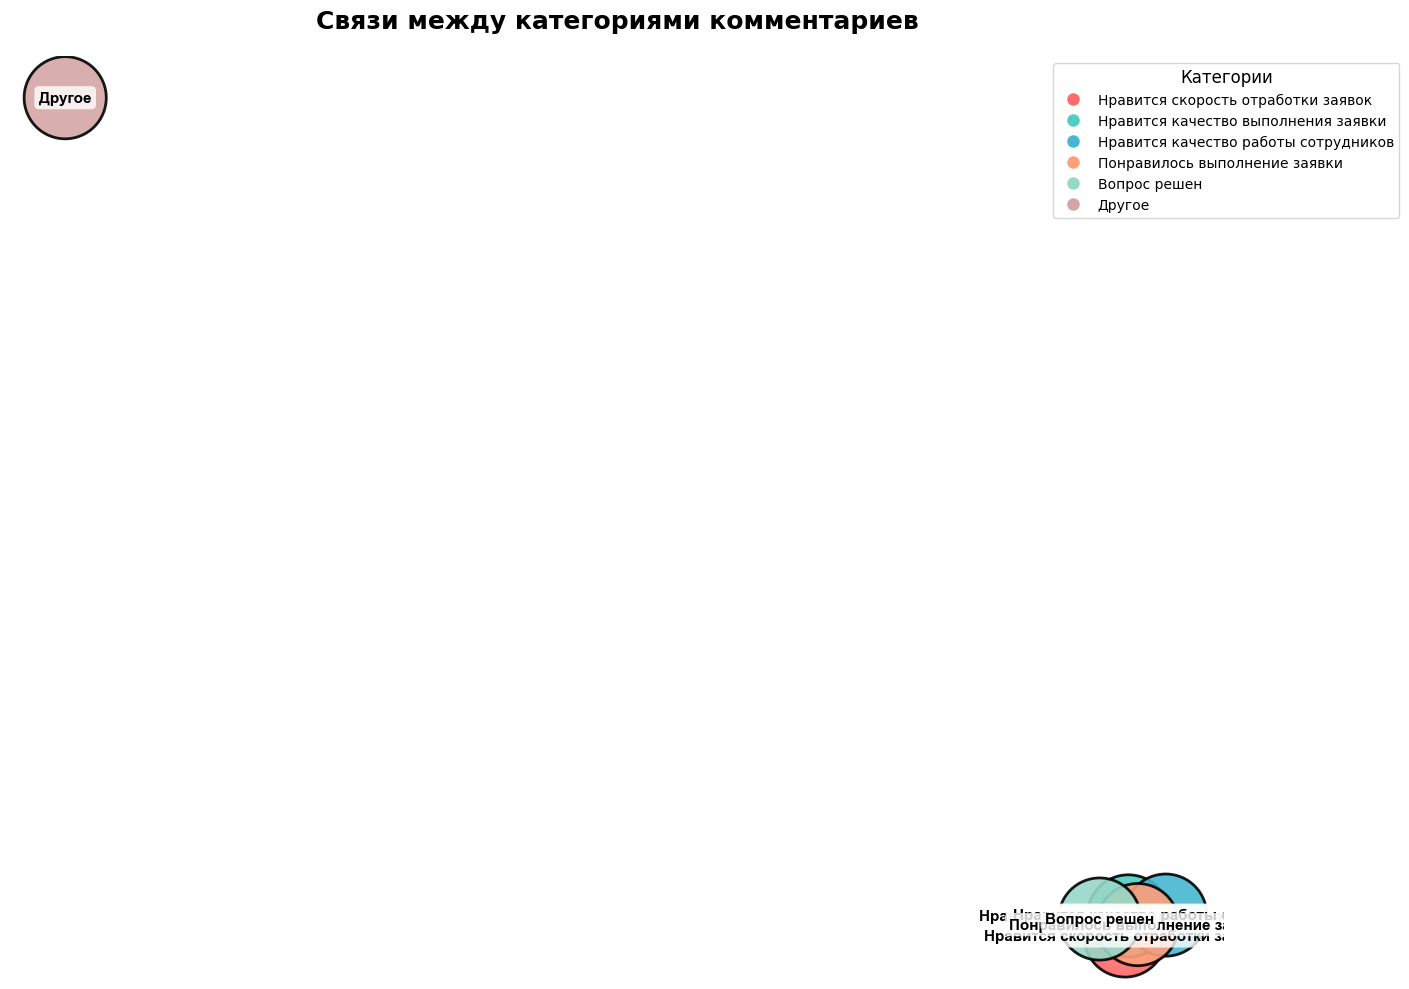

In [25]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Загрузка данных
data = pd.read_csv('Main_комментарии.csv')

# Переименовываем "Без категории" в "Другое"
if 'Без категории' in data.columns:
    data = data.rename(columns={'Без категории': 'Другое'})

# Категории для анализа
categories = [
    'Нравится скорость отработки заявок',
    'Нравится качество выполнения заявки',
    'Нравится качество работы сотрудников',
    'Понравилось выполнение заявки',
    'Вопрос решен',
    'Другое'
]

# Создаем граф
G = nx.Graph()

# Добавляем узлы
for category in categories:
    G.add_node(category)

# Добавляем ребра с весами (частота совместного упоминания)
for _, row in data.iterrows():
    active_cats = [cat for cat in categories if row[cat] == 1]
    for i in range(len(active_cats)):
        for j in range(i + 1, len(active_cats)):
            if G.has_edge(active_cats[i], active_cats[j]):
                G[active_cats[i]][active_cats[j]]['weight'] += 1
            else:
                G.add_edge(active_cats[i], active_cats[j], weight=1)

# Настраиваем визуализацию
plt.figure(figsize=(14, 10))
plt.title("Связи между категориями комментариев", fontsize=18, pad=20, fontweight='bold')

# Позиционируем узлы (используем Fruchterman-Reingold для лучшего распределения)
pos = nx.spring_layout(G, k=0.6, seed=42, iterations=100)

# Цветовая схема
node_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#D4A5A5']
edge_colors = ['#5D5D5D']

# Рисуем ребра (с плавными изгибами и градиентом)
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
max_weight = max(edge_weights) if edge_weights else 1
edge_alphas = [0.4 + 0.6 * (w / max_weight) for w in edge_weights]  # Прозрачность по весу

for (u, v), alpha in zip(G.edges(), edge_alphas):
    nx.draw_networkx_edges(
        G, pos,
        edgelist=[(u, v)],
        width=1.5 + 2 * (G[u][v]['weight'] / max_weight),  # Толщина по весу
        edge_color=edge_colors[0],
        alpha=alpha,
        connectionstyle="arc3,rad=0.1"  # Изогнутые ребра
    )

# Рисуем узлы (с тенями и градиентами)
nx.draw_networkx_nodes(
    G, pos,
    node_size=3500,
    node_color=node_colors,
    edgecolors='black',
    linewidths=2,
    alpha=0.9
)

# Подписи узлов (с обводкой для лучшей читаемости)
nx.draw_networkx_labels(
    G, pos,
    font_size=11,
    font_weight='bold',
    font_family='Arial',
    bbox=dict(
        facecolor='white',
        edgecolor='none',
        alpha=0.8,
        boxstyle='round,pad=0.3'
    )
)

# Легенда (пояснение цветов)
legend_labels = [f"{cat}" for cat in categories]
legend_colors = node_colors
legend_patches = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) 
                  for color in legend_colors]
plt.legend(
    legend_patches, legend_labels,
    loc='upper right',
    bbox_to_anchor=(1.15, 1),
    title="Категории",
    title_fontsize=12,
    fontsize=10
)

# Добавляем подписи весов ребер (если нужно)
if edge_weights:
    edge_labels = {(u, v): f"{w}" for u, v, w in G.edges(data='weight')}
    nx.draw_networkx_edge_labels(
        G, pos,
        edge_labels=edge_labels,
        font_size=9,
        font_color='black',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')
    )

plt.axis('off')
plt.tight_layout()
plt.show()

(KNOWLEDGE GRAPH + NLP)

C:\Users\user\AppData\Local\Temp\ipykernel_11836\1507571620.py:81: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for connectionstyle.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(


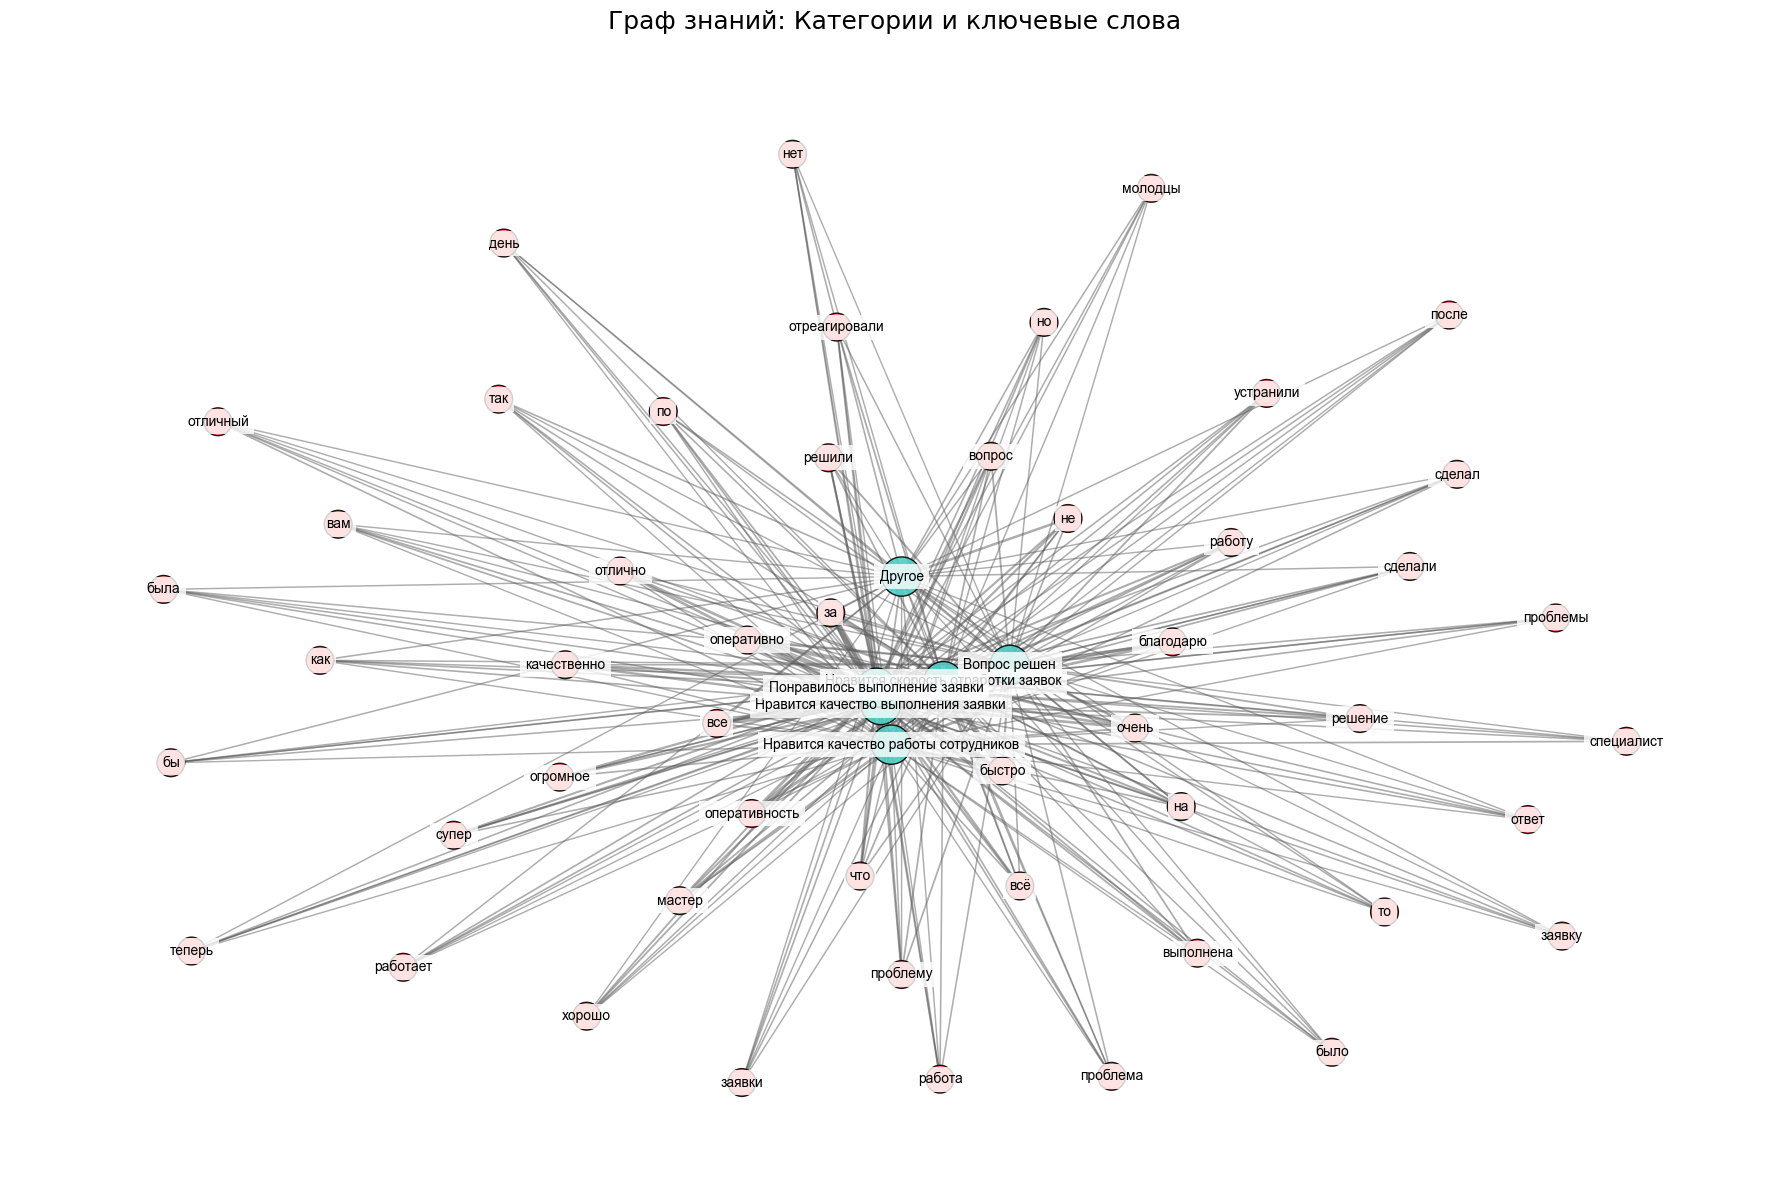

In [26]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
import numpy as np

# Загрузка данных
data = pd.read_csv('Main_комментарии.csv')

# Переименование "Без категории" в "Другое"
if 'Без категории' in data.columns:
    data = data.rename(columns={'Без категории': 'Другое'})

# Категории
categories = [
    'Нравится скорость отработки заявок',
    'Нравится качество выполнения заявки',
    'Нравится качество работы сотрудников',
    'Понравилось выполнение заявки',
    'Вопрос решен',
    'Другое'
]

# Анализ ключевых слов (TF-IDF)
tfidf = TfidfVectorizer(max_features=50, stop_words=['спасибо', 'большое'])
tfidf_matrix = tfidf.fit_transform(data['comment'])
feature_names = tfidf.get_feature_names_out()

# Создаем граф
G = nx.Graph()

# Добавляем категории как узлы
for category in categories:
    G.add_node(category, type='category', color='#4ECDC4')

# Добавляем ключевые слова как узлы
for word in feature_names:
    G.add_node(word, type='word', color='#FF6B6B')

# Связи: категория -> ключевые слова (на основе комментариев)
category_word_counts = defaultdict(lambda: defaultdict(int))

for _, row in data.iterrows():
    comment = row['comment']
    words = set(tfidf.transform([comment]).nonzero()[1])  # Индексы слов в комментарии
    for cat in categories:
        if row[cat] == 1:
            for word_idx in words:
                word = feature_names[word_idx]
                category_word_counts[cat][word] += 1

# Добавляем ребра (категория -> слово) с весами
for cat, words in category_word_counts.items():
    for word, count in words.items():
        G.add_edge(cat, word, weight=count)

# Визуализация
plt.figure(figsize=(18, 12))
pos = nx.spring_layout(G, k=0.7, seed=42)

# Цвета узлов
node_colors = [G.nodes[n]['color'] for n in G.nodes()]
node_sizes = [800 if G.nodes[n]['type'] == 'category' else 400 for n in G.nodes()]

# Рисуем узлы
nx.draw_networkx_nodes(
    G, pos,
    node_size=node_sizes,
    node_color=node_colors,
    edgecolors='black',
    linewidths=1,
    alpha=0.9
)

# Рисуем ребра
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
max_weight = max(edge_weights) if edge_weights else 1
edge_widths = [1 + 3 * (w / max_weight) for w in edge_weights]

nx.draw_networkx_edges(
    G, pos,
    width=edge_widths,
    edge_color='#5D5D5D',
    alpha=0.5,
    connectionstyle="arc3,rad=0.1"
)

# Подписи (только для категорий и важных слов)
labels = {}
for node in G.nodes():
    if G.nodes[node]['type'] == 'category' or G.degree(node) > 2:
        labels[node] = node

nx.draw_networkx_labels(
    G, pos, labels,
    font_size=10,
    font_family='Arial',
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none')
)

plt.title("Граф знаний: Категории и ключевые слова", fontsize=18, pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()

LOGISTIC REGRESSION

Первые 5 строк данных:
        id  rating                                       comment  \
0  2945792       5                                       спасибо   
1  3234340       5                                      спасибо!   
2  3380332       5                                      Отлично    
3  3381812       5  Благодарю за оперативное решение проблемы !    
4  3461991       5         Прекрасный специалист! Побольше таких   

   Нравится скорость отработки заявок  Нравится качество выполнения заявки  \
0                                   0                                    1   
1                                   0                                    1   
2                                   0                                    1   
3                                   1                                    1   
4                                   0                                    0   

   Нравится качество работы сотрудников  Понравилось выполнение заявки  \
0                        

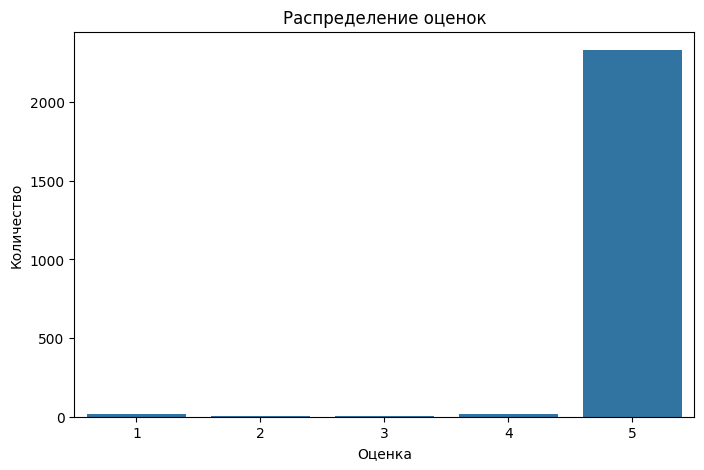


Распределение целевой переменной:
high_rating
1    0.989043
0    0.010957
Name: proportion, dtype: float64

Точность модели: 0.9887640449438202

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.99      1.00      0.99       704

    accuracy                           0.99       712
   macro avg       0.49      0.50      0.50       712
weighted avg       0.98      0.99      0.98       712


Коэффициенты модели:


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

                                Признак  Коэффициент
1   Нравится качество выполнения заявки     0.621012
3         Понравилось выполнение заявки     0.376951
0    Нравится скорость отработки заявок     0.280268
2  Нравится качество работы сотрудников     0.220645
4                          Вопрос решен    -0.137662


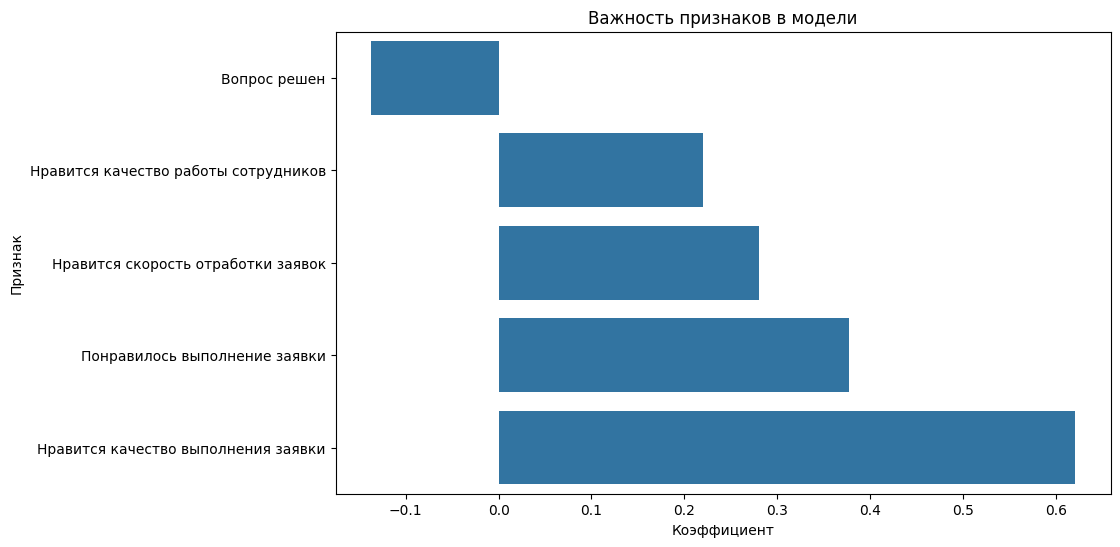

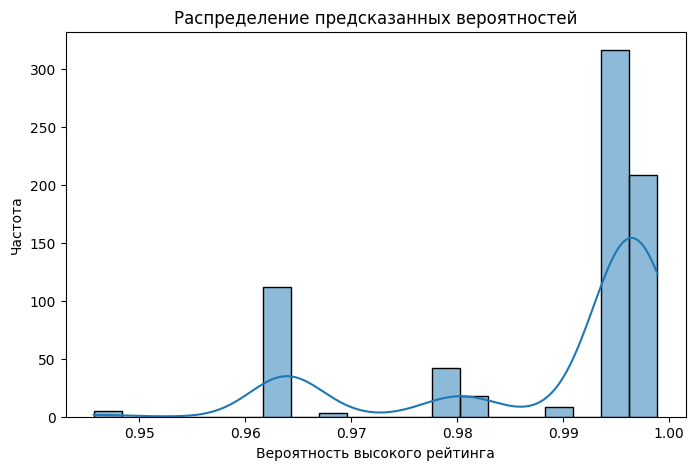


Пример предсказаний для новых данных:
Пример 1: Предсказанный класс = 1 (Вероятности: [0.00169088 0.99830912])
Пример 2: Предсказанный класс = 1 (Вероятности: [0.00621479 0.99378521])
Пример 3: Предсказанный класс = 1 (Вероятности: [0.02035179 0.97964821])


In [29]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных (предполагаем, что файл находится в той же директории)
try:
    data = pd.read_csv('Main_комментарии.csv', encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv('Main_комментарии.csv', encoding='cp1251')

# Предварительный анализ данных
print("Первые 5 строк данных:")
print(data.head())
print("\nИнформация о данных:")
print(data.info())
print("\nОписательная статистика:")
print(data.describe())

# Визуализация распределения рейтингов
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=data)
plt.title('Распределение оценок')
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.show()

# Создание бинарной целевой переменной (высокий рейтинг 4-5 vs низкий 1-3)
data['high_rating'] = data['rating'].apply(lambda x: 1 if x >= 4 else 0)

# Анализ распределения целевой переменной
print("\nРаспределение целевой переменной:")
print(data['high_rating'].value_counts(normalize=True))

# Выбор признаков и целевой переменной
features = ['Нравится скорость отработки заявок', 
            'Нравится качество выполнения заявки', 
            'Нравится качество работы сотрудников', 
            'Понравилось выполнение заявки', 
            'Вопрос решен']
X = data[features]
y = data['high_rating']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание и обучение модели логистической регрессии
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Оценка модели
print("\nТочность модели:", accuracy_score(y_test, y_pred))
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred))


# Коэффициенты модели
print("\nКоэффициенты модели:")
coefficients = pd.DataFrame({
    'Признак': features,
    'Коэффициент': model.coef_[0]
})
print(coefficients.sort_values('Коэффициент', ascending=False))

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
sns.barplot(x='Коэффициент', y='Признак', data=coefficients.sort_values('Коэффициент'))
plt.title('Важность признаков в модели')
plt.show()

# Анализ предсказанных вероятностей
plt.figure(figsize=(8, 5))
sns.histplot(y_pred_proba, bins=20, kde=True)
plt.title('Распределение предсказанных вероятностей')
plt.xlabel('Вероятность высокого рейтинга')
plt.ylabel('Частота')
plt.show()

# Пример использования модели для новых данных
new_data = pd.DataFrame({
    'Нравится скорость отработки заявок': [1, 0, 1],
    'Нравится качество выполнения заявки': [1, 1, 0],
    'Нравится качество работы сотрудников': [1, 0, 0],
    'Понравилось выполнение заявки': [1, 1, 0],
    'Вопрос решен': [1, 1, 0]
})

new_data_scaled = scaler.transform(new_data)
predictions = model.predict(new_data_scaled)
probabilities = model.predict_proba(new_data_scaled)

print("\nПример предсказаний для новых данных:")
for i, (pred, prob) in enumerate(zip(predictions, probabilities)):
    print(f"Пример {i+1}: Предсказанный класс = {pred} (Вероятности: {prob})")

RANDOM FOREST

In [6]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import nltk
import numpy as np

# Скачиваем необходимые ресурсы для NLTK
nltk.download('punkt')

# Загрузка данных
try:
    data = pd.read_csv('Main_комментарии.csv', encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv('Main_комментарии.csv', encoding='cp1251')

# Определение целевых переменных
target_columns = [
    'Нравится скорость отработки заявок',
    'Нравится качество выполнения заявки',
    'Нравится качество работы сотрудников',
    'Понравилось выполнение заявки',
    'Вопрос решен',
    'Без категории'
]

# Переименуем последнюю колонку
data = data.rename(columns={'Без категории': 'Другое'})
target_columns[-1] = 'Другое'

# Проверка данных
print(f"Всего комментариев: {len(data)}")
print("Распределение по категориям:")
print(data[target_columns].sum())

# Предобработка текста
stemmer = SnowballStemmer("russian")

def preprocess_text(text):
    if pd.isna(text) or not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    try:
        tokens = word_tokenize(text)
        stems = [stemmer.stem(token) for token in tokens if token.isalpha()]
        return ' '.join(stems)
    except:
        return text

# Применение предобработки
data['processed_comment'] = data['comment'].apply(preprocess_text)

# Векторизация текста
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['processed_comment'])
y = data[target_columns].values

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Создание и обучение модели
print("\nОбучение модели...")
model = MultiOutputClassifier(RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
))
model.fit(X_train, y_train)

# Оценка модели
print("\nОценка качества модели:")
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_columns))

# Функция для классификации новых комментариев
def classify_comment(comment):
    """Классифицирует новый комментарий по всем категориям"""
    processed_comment = preprocess_text(comment)
    if not processed_comment.strip():
        return {col: 0.0 for col in target_columns}
    
    # Векторизация текста
    vectorized = vectorizer.transform([processed_comment])
    
    # Получение предсказаний
    proba = model.predict_proba(vectorized)
    
    result = {}
    for i, col in enumerate(target_columns):
        # Для multi-output классификации predict_proba возвращает список массивов
        result[col] = proba[i][0][1]  # Вероятность положительного класса
    return result

# Пример использования
test_comments = [
    "Спасибо за быстрый ответ!",
    "Мастер пришел быстро и все починил качественно",
    "Проблема не решена, жду ответа",
    "Сотрудники вежливые и профессиональные",
    "Непонятно что происходит с моей заявкой",
    ""
]

print("\nПримеры классификации:")
for comment in test_comments:
    print(f"\nКомментарий: '{comment}'")
    classification = classify_comment(comment)
    for cat, prob in classification.items():
        print(f"{cat}: {prob:.2f}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Всего комментариев: 2373
Распределение по категориям:
Нравится скорость отработки заявок       812
Нравится качество выполнения заявки     1734
Нравится качество работы сотрудников     249
Понравилось выполнение заявки           1677
Вопрос решен                             274
Другое                                   366
dtype: int64

Обучение модели...

Оценка качества модели:


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                      precision    recall  f1-score   support

  Нравится скорость отработки заявок       1.00      0.94      0.97       180
 Нравится качество выполнения заявки       0.99      0.96      0.98       349
Нравится качество работы сотрудников       0.97      0.79      0.87        48
       Понравилось выполнение заявки       0.99      0.96      0.98       338
                        Вопрос решен       1.00      0.88      0.94        58
                              Другое       0.84      0.86      0.85        76

                           micro avg       0.98      0.94      0.96      1049
                           macro avg       0.97      0.90      0.93      1049
                        weighted avg       0.98      0.94      0.96      1049
                         samples avg       0.95      0.93      0.93      1049


Примеры классификации:

Комментарий: 'Спасибо за быстрый ответ!'
Нравится скорость отработки заявок: 0.97
Нравится качество выполнения зая